# Matplotlib

The `matplotlib` package contains numerous modules that allow scientists to create great looking plots that really help to eplain and understand their data and their results.

This notebook gives brief examples of how to read in some data from a CSV file and then plot it using the functionality provided by `matplotlib`. The examples we'll cover demonstrate just a few of the powerful utilities the package contains. After reviewing this material you might like to compare it with the `UsingBokeh` notebook.

We've provided a data file called `'compton.csv'` to accompany the examples. It needs to be in the same folder as this notebook.

As usual the first code cell contains statements to import modules and perform some notebook setup.

The `%matplotlib inline` statement just instructs `matplotlib` to render any figures directly into the Jupyter Notebook interface - you wouldn't need this in an 'ordinary' Python program.

The `plt.rcParams['figure.figsize']=[12,8]` just sets a default size (12x8 inches) for any figure that we produce. This default can be overriden if neccessary.


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#Set the size of subsequent plots
plt.rcParams['figure.figsize']=[12,8]
%matplotlib inline

## 1. Read in the data

Now we'll read in some data. In this case the data comes from the SXPA288 Compton experiment. The `compton.csv` file contains seven columns. The first simply contains channel numbers, the second is calibration data and the remaining 5 columns contain measurement data for scattering angles of 30, 60, 90 120 and 150 degrees.

The first line of the file contains the column header names: 
    
    Channels,Calibration,30,60,90,120,150

We'll read in the CSV data to a _Pandas_ `DataFrame` (See the `UsingPandas` notebook). If you didn't want to use _Pandas_ you could also use the _NumPy_ **`genfromtxt()`** function to read data from the CSV file. 


In [2]:
# Read in multi-column data from a CSV to array
#compton_data=np.genfromtxt('compton.csv', delimiter=',', names=True)
compton_data = pd.read_csv('compton.csv')
# Let's have alook at the first few rows
compton_data.head()

,Channels,Calibration,30,60,90,120,150
0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0
2,2,0,0,0,0,0,0
3,3,0,0,0,0,0,0
4,4,0,0,0,0,0,0


## 2. A simple plot

Let's start by making a simple plot of the `Calibration` value versus channel number (the `Channels` column). We'll use the **`plot`** function from the **`matplotlib.pyplot`** module. The plot function accepts sequences of corresponding _x_ (`Channels`) and _y_ (`Calibration`) values as its arguments. 

We can spruce our plot up a bit by adding axis labels and a title. We'll also pass the optional **`label`** argumentto **`plot()`**, which will be used later to produce a figure legend.

> It may seem strange to add the title and labels _after_ the call to **`plot()`** (instead of specifying them as additional arguments) but just remember that `matplotlib` implicitly assumes that any other instructions we use apply to the last figure that was plotted.


Text(0, 0.5, 'Intensity')

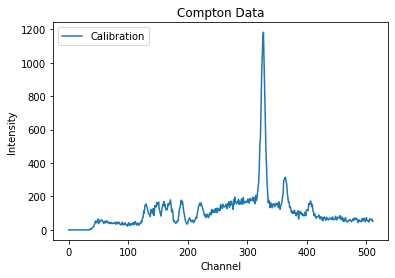

In [3]:
plt.plot(compton_data['Channels'], compton_data['Calibration'], label='Calibration')
plt.title('Compton Data')
plt.legend(loc='upper left')
plt.xlabel('Channel')
plt.ylabel('Intensity')

## 3. Making a plot with more than one line

What about plotting a second dataset? Simple! Just call **`plot()`** again, passing the new data. We've added the optional **`color`** argument to the second call so that we can distinguish the two lines in the plot and the legend.

> Note that the second call to **`plot()`** hasn't created a new set of axes. Instead `matplotlib` implicitly assumes that we want to overplot the new data on the existing figure.

Text(0, 0.5, 'Intensity')

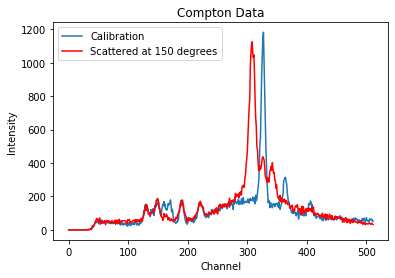

In [4]:
plt.plot(compton_data['Channels'], compton_data['Calibration'], label='Calibration')
plt.plot (compton_data['Channels'], compton_data['150'], label='Scattered at 150 degrees', color='red')
plt.title('Compton Data')
plt.legend(loc='upper left')
plt.xlabel('Channel')
plt.ylabel('Intensity')

## 4. Annotations

Before we move on, `matplotlib` provides plently of functions to make your plots more informative and easier to interpret. As an example, how about adding some annotations? See if you can work out how the code in the next cell adds arrows and labels to our plot.

Finally, you can uncomment the first line below to produce a 'fun' cartoonised plot!

Text(450, 400, '$K \\beta$')

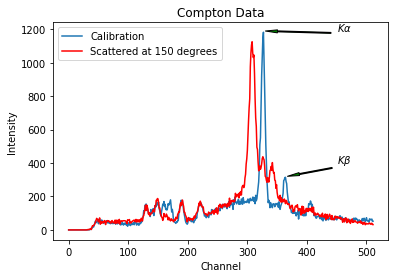

In [5]:
# plt.xkcd() # For a bit of fun, uncomment this line!
plt.plot(compton_data['Channels'], compton_data['Calibration'], label='Calibration')
plt.plot (compton_data['Channels'], compton_data['150'], label='Scattered at 150 degrees', color='red')

plt.title('Compton Data')
plt.legend(loc='upper left')
plt.xlabel('Channel')
plt.ylabel('Intensity')

plt.annotate(r"$K \alpha$", xy=(324,1191), xytext=(450, 1190), arrowprops=dict(facecolor='green', width=1, headwidth=3, shrink=.05))
plt.annotate(r"$K \beta$", xy=(363,318), xytext=(450, 400), arrowprops=dict(facecolor='green', width=1, headwidth=3, shrink=.05))

## 4. Further customisations

The `matplotlib` package allows you to customise the figures you produce in many ways. You can change colours, choose different markers for your data points, use different line styles and much more. You can also produce a wide variety of plot types including produce scatter plots and polar projections. To find out more about the available options, the [`matplotlib` documentation](https://matplotlib.org/3.1.0/tutorials/introductory/pyplot.html#sphx-glr-tutorials-introductory-pyplot-py) is the best place to start.


## 4.1 Polar plots

The code in the next cell shows how to use `matplotlib` to produce a 'polar' plot. For those of you who choose the ARROW project, this example will be useful when plotting the spiral arms of the Galaxy


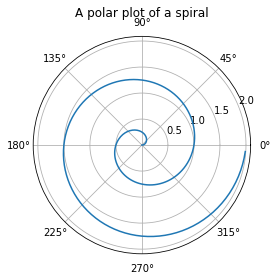

In [6]:
r = np.arange(0, 2, 0.01)
theta = 2 * np.pi * r

plt.subplot(111, projection='polar')
plt.plot(theta, r)
# For 'yticks', read 'radial ticks'
plt.yticks([0.5, 1, 1.5, 2])
plt.grid(True)
plt.title("A polar plot of a spiral", va='bottom')
plt.show()

## 5. Multiple sub-plots

Sometimes it makes sense to group several subplots together in the same figure. This example shows how to produce simple multiplots.

To keep things simple, the example code makes use of `matplotlib`'s implicit focus on the last object that was plotted. Every time we call the **`subplot()`** function we create a new a `matplotlib` `axes` object and define a new context for `matplotlib` to focus on. All of these `axes` objects are contained within anoter type of object - a `matplotlib` `figure`. Fine-grained control of subplot can be achieved by addressing the `figure` and `axes` objects directly. This is beyond the scope of this notebook but details can be found in the `matplotlib` documentation. A good place to start might be the [Subplots Demo](https://matplotlib.org/3.1.0/gallery/subplots_axes_and_figures/subplots_demo.html).

The main thing to notice for this example is the **`plt.subplot()`** function, which is often used with three arguments i.e. **`plt.subplot(nrows, ncols, index)`**. The first two arguments arguments specify that the enclosing `figure` is implicitly divided into a grid with **`nrows`** rows and **`ncols`** columns. The **`index`** argument defines which cell of the implicit grid corresponds to the location of the subplot we are defining. Positions are defined by an integer value starting with `1` in the top left corner and increasing to the right and downwards.

The **`plt.suptitle()`** function defines an overall title for the figure containing the subplots.

Finally, the **`plt.tight_layout()`** function adjusts the positions of the various subplot elements slightly to avoid any overlaps and achieve a professional looking layout. 


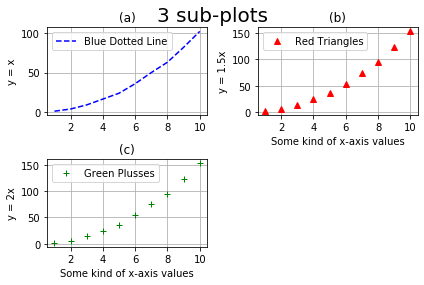

In [7]:
my_url = 'http://physics.open.ac.uk/squares_2.csv'
sq_data = pd.read_csv(my_url)

x = sq_data['x_values']
y = sq_data['y_values']
y2 = y*1.5
y3 = y*2

plt.subplot(2,2,1, title='(a)')
plt.plot(x,y, 'b--',label='Blue Dotted Line')
plt.ylabel('y = x')
plt.grid()
plt.legend()

plt.subplot(2,2,2, title='(b)')
plt.plot(x,y2, 'r^', label='Red Triangles')
plt.xlabel('Some kind of x-axis values')
plt.ylabel('y = 1.5x')
plt.grid()
plt.legend()

plt.subplot(2,2,3, title='(c)')
plt.plot(x,y2, 'g+', label='Green Plusses')
plt.xlabel('Some kind of x-axis values')
#plt.xlabel('title of the xlabel', fontweight='bold', color = 'orange', fontsize='17', horizontalalignment='center')
plt.ylabel('y = 2x')
plt.grid()
plt.legend()

plt.suptitle('3 sub-plots', size=20)
plt.tight_layout()